## Student Information
**Student ID** 25000148967

**GitHub Repository Link** https://github.com/robwhite-lis/Everything_Counts_Assessment_2

In [7]:
# Here is the boiler plate code we use to read in the raw data from GitHub
#

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
# seaborn is a better tool for this with more examples 
import seaborn as sns


df_url = 'https://raw.githubusercontent.com/robwhite-lis/Everything_Counts_Assessment_2/refs/heads/main/census-2021-publicmicrodatateachingsample.csv'
url_content = requests.get(df_url, verify = False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

df

,resident_id_m,approx_social_grade,country_of_birth_3a,economic_activity_status_10m,ethnic_group_tb_6a,health_in_general,hh_families_type_6a,hours_per_week_worked,in_full_time_education,industry_10a,iol22cd,legal_partnership_status_6a,occupation_10a,region,religion_tb,residence_type,resident_age_7d,sex,usual_short_student
0,PTS000000588097,4,1,1,4,1,4,4,2,4,-8,1,5,E12000003,2,1,4,2,1
1,PTS000000000320,-8,1,5,4,2,1,-8,2,7,-8,1,2,E12000005,2,1,7,2,1
2,PTS000000397448,-8,2,5,4,2,1,-8,2,7,-8,1,3,E12000002,2,1,7,2,1
3,PTS000000082442,-8,1,5,4,3,2,-8,2,8,-8,2,8,E12000006,2,1,7,1,1
4,PTS000000016066,4,1,8,4,2,1,-8,2,9,-8,1,9,E12000002,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604346,PTS000000166524,-8,2,6,4,1,-8,-8,1,-8,-8,1,-8,E12000006,9,2,2,2,1
604347,PTS000000246489,2,1,1,4,2,2,3,2,5,-8,2,7,E12000002,2,1,6,1,1
604348,PTS000000177162,-8,1,9,4,2,-8,-8,2,-8,-8,1,-8,E12000001,2,2,6,1,1
604349,PTS000000377217,-8,1,6,4,1,-8,-8,1,7,-8,1,5,E12000001,1,2,2,2,1


In [8]:
df.dtypes

resident_id_m                   object
approx_social_grade              int64
country_of_birth_3a              int64
economic_activity_status_10m     int64
ethnic_group_tb_6a               int64
health_in_general                int64
hh_families_type_6a              int64
hours_per_week_worked            int64
in_full_time_education           int64
industry_10a                     int64
iol22cd                         object
legal_partnership_status_6a      int64
occupation_10a                   int64
region                          object
religion_tb                      int64
residence_type                   int64
resident_age_7d                  int64
sex                              int64
usual_short_student              int64
dtype: object

In [9]:
df.columns

Index(['resident_id_m', 'approx_social_grade', 'country_of_birth_3a',
       'economic_activity_status_10m', 'ethnic_group_tb_6a',
       'health_in_general', 'hh_families_type_6a', 'hours_per_week_worked',
       'in_full_time_education', 'industry_10a', 'iol22cd',
       'legal_partnership_status_6a', 'occupation_10a', 'region',
       'religion_tb', 'residence_type', 'resident_age_7d', 'sex',
       'usual_short_student'],
      dtype='object')

In [18]:
# hypothesis - wealth of lone parent family shouldn't make a difference if lone parent is male or female
# hh_families_type_6a - == 4 is lone parent
# sex 1, female, 2 male
# approx_social_grade 4 is lowest so we need 4 or not 4
# lpf == lone_parent_family

lpf = df[df['hh_families_type_6a'] == 4]
lpf.shape



(82801, 19)

In [19]:
# let's look at the average wealth
nasg = lpf[lpf['approx_social_grade'] == -8]
nasg.shape


(9820, 19)

In [20]:
# asg (average social grade) cleansed data set with only the lone single parents that have an avg social grade
asg = lpf[lpf['approx_social_grade'] != -8]
asg.shape

(72981, 19)

In [28]:
# Add a descriptive value for male / female

asg['sex_desc'] = np.where(asg['sex'] ==1, 'Female', 'Male')

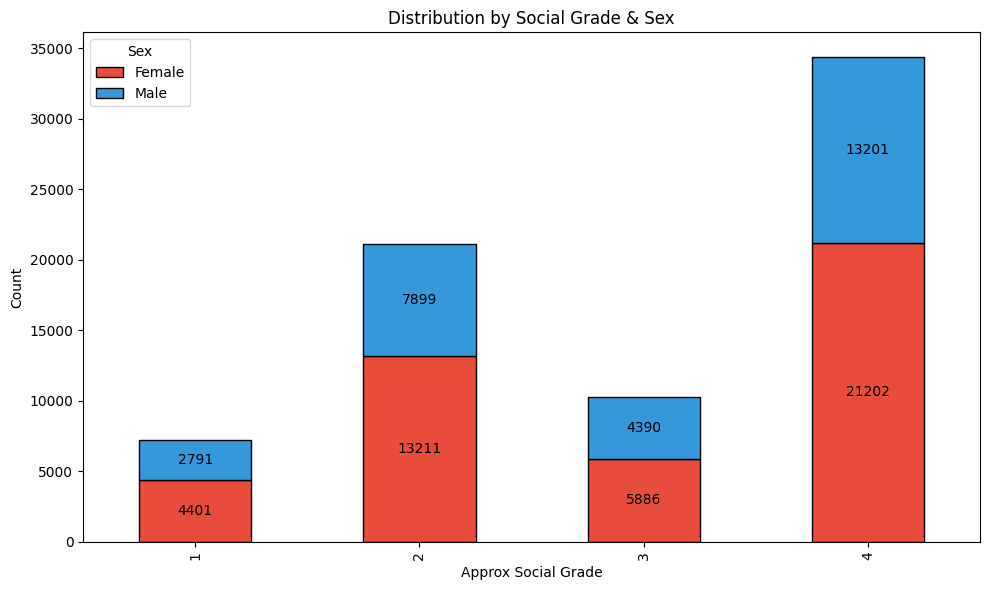

In [32]:
# Grouped bar chart
ax = asg.groupby(['approx_social_grade', 'sex_desc']).size().unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#e74c3c', '#3498db'],
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center')
    

plt.xlabel('Approx Social Grade')
plt.ylabel('Count')
plt.title('Distribution by Social Grade & Sex')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

In [33]:
# Let's now charactarise the social groups some more between low and high. High will be 1,2 or 3, low will be 4.

asg['asg_desc'] = np.where(asg['approx_social_grade'] == 4, 'Low', 'High')

asg


,resident_id_m,approx_social_grade,country_of_birth_3a,economic_activity_status_10m,ethnic_group_tb_6a,health_in_general,hh_families_type_6a,hours_per_week_worked,in_full_time_education,industry_10a,...,legal_partnership_status_6a,occupation_10a,region,religion_tb,residence_type,resident_age_7d,sex,usual_short_student,sex_desc,asg_desc
0,PTS000000588097,4,1,1,4,1,4,4,2,4,...,1,5,E12000003,2,1,4,2,1,Male,Low
18,PTS000000023084,1,1,-8,3,1,4,-8,-8,-8,...,-8,-8,E12000009,2,1,1,1,1,Female,High
26,PTS000000021151,4,1,-8,4,1,4,-8,1,-8,...,-8,-8,E12000009,1,1,1,2,1,Male,Low
45,PTS000000595075,2,2,2,1,1,4,4,2,5,...,2,5,E12000009,1,1,7,1,1,Female,High
50,PTS000000552053,3,1,2,4,2,4,1,2,7,...,1,9,E12000007,2,1,4,2,1,Male,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604201,PTS000000417995,2,1,7,4,1,4,-8,2,2,...,4,9,W92000004,1,1,4,1,1,Female,High
604283,PTS000000213913,4,1,2,1,2,4,3,2,6,...,1,8,E12000005,6,1,3,2,1,Male,Low
604289,PTS000000006673,4,1,-8,4,1,4,-8,-8,-8,...,-8,-8,E12000006,1,1,1,1,1,Female,Low
604308,PTS000000324124,4,1,1,2,2,4,3,2,5,...,1,4,E12000007,9,1,3,2,1,Male,Low


In [40]:
asg[asg['sex'] == 2]




,resident_id_m,approx_social_grade,country_of_birth_3a,economic_activity_status_10m,ethnic_group_tb_6a,health_in_general,hh_families_type_6a,hours_per_week_worked,in_full_time_education,industry_10a,...,legal_partnership_status_6a,occupation_10a,region,religion_tb,residence_type,resident_age_7d,sex,usual_short_student,sex_desc,asg_desc
0,PTS000000588097,4,1,1,4,1,4,4,2,4,...,1,5,E12000003,2,1,4,2,1,Male,Low
26,PTS000000021151,4,1,-8,4,1,4,-8,1,-8,...,-8,-8,E12000009,1,1,1,2,1,Male,Low
50,PTS000000552053,3,1,2,4,2,4,1,2,7,...,1,9,E12000007,2,1,4,2,1,Male,High
67,PTS000000394161,4,2,1,1,2,4,3,2,3,...,2,9,E12000007,8,1,6,2,1,Male,Low
96,PTS000000600453,4,1,-8,4,1,4,-8,1,-8,...,-8,-8,E12000003,1,1,1,2,1,Male,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604158,PTS000000417213,4,1,-8,4,1,4,-8,1,-8,...,-8,-8,W92000004,1,1,1,2,1,Male,Low
604168,PTS000000136840,2,1,1,4,1,4,3,2,2,...,1,8,W92000004,2,1,3,2,1,Male,High
604195,PTS000000084106,2,1,-8,4,1,4,-8,1,-8,...,-8,-8,W92000004,2,1,1,2,1,Male,High
604283,PTS000000213913,4,1,2,1,2,4,3,2,6,...,1,8,E12000005,6,1,3,2,1,Male,Low


In [41]:
asg.shape

(72981, 21)

In [43]:
# Build a contingency table
print(f"\nContingency Table:")
observed_table = pd.crosstab(asg['sex_desc'], asg['asg_desc'], margins=True)
print(observed_table)



Contingency Table:
asg_desc   High    Low    All
sex_desc                     
Female    23498  21202  44700
Male      15080  13201  28281
All       38578  34403  72981


In [47]:
# Calculate the total number of males and females in my total sample
# Calculate the number of males and females in the low social group
n_female = (asg['sex_desc'] == 'Female').sum()
n_male = (asg['sex_desc'] == 'Male').sum()

female_low = ((asg['sex_desc'] == 'Female') & (asg['asg_desc'] == 'Low')).sum()
male_low = ((asg['sex_desc'] == 'Male') & (asg['asg_desc'] == 'Low')).sum()

prop_female_low = female_low / n_female
prop_male_low = male_low / n_male

#print(n_female)
#print(n_male)

#print(female_low)
#print(male_low)

#print(prop_female_low)
#print(prop_male_low)

observed_diff = prop_female_low - prop_male_low
print(observed_diff)

# 0.0075 is the prop diff, so x 100 give a % of 0.75% more females than males in my sample, is this chance?

0.007537856539916177


In [49]:
# Now run the permutations

# Set number of permutations
n_permutations = 10000
np.random.seed(42)  # Setting the seed ensures reproducibility, not strictly necessary but helps when trying to debug

# Creates 2 numpy arrays, one for low social group and one for sex_label.
is_low = (asg['asg_desc'] == 'low').values
sex_labels = asg['sex_desc'].values

print(is_low)
print(sex_labels)

# Create a numpy array to store results
permuted_diffs = np.zeros(n_permutations)


# Run permutations
# Each iteration of the loop will create a new diff between proportion of female and proportion of males in low social grouping.
for i in range(n_permutations):
    # Shuffle sex labels randomly
    permuted_sex = np.random.permutation(sex_labels)
    
    # Calculate statistic for this permutation
    female_low_perm = is_low[permuted_sex == 'Female'].sum()
    male_low_perm = is_low[permuted_sex == 'Male'].sum()
    
    prop_female_perm = female_low_perm / n_female
    prop_male_perm = male_low_perm / n_male
    
    permuted_diffs[i] = prop_female_perm - prop_male_perm
    
    # Progress indicator
    if (i + 1) % 2000 == 0:
        print(f"  Completed {i + 1}/{n_permutations} permutations...")

print("Permutations complete!")



[False False False ... False False False]
['Male' 'Female' 'Male' ... 'Female' 'Male' 'Female']
  Completed 2000/10000 permutations...
  Completed 4000/10000 permutations...
  Completed 6000/10000 permutations...
  Completed 8000/10000 permutations...
  Completed 10000/10000 permutations...
Permutations complete!
